### Import Important Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir('E:\\prasad\\practice\\My Working Projects\\Completed\\NLP\\Text Classification in NLP using ML(SVM)')

### Perform Imports and Load Data

In [3]:
df=pd.read_table('smsspamcollection.tsv',sep='\t')
df.head(2)

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6


In [4]:
df.shape

(5572, 4)

In [5]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

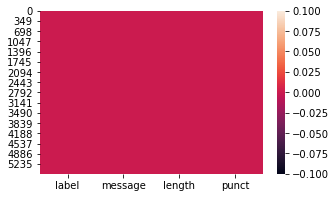

In [6]:
plt.figure(figsize=(5,3))
sns.heatmap(df.isnull())
plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


In [8]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


### Visualize the data:

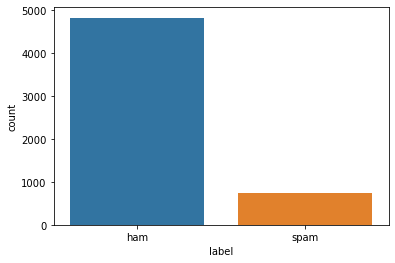

In [9]:
sns.countplot(df.label)
plt.show()

In [10]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

### Data Split into Train,Test

In [11]:
X=df['message']
X.head(2)

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
Name: message, dtype: object

In [12]:
y=df['label']
y.head(2)

0    ham
1    ham
Name: label, dtype: object

In [13]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,RandomizedSearchCV

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3900,), (1672,), (3900,), (1672,))

### Featuer Extraction of NLP

In [15]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.pipeline import Pipeline

### Model Building

In [16]:
svm=Pipeline([('tfidf',TfidfVectorizer()),
                 ('svm',SVC())])
svm.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svm', SVC())])

In [17]:
y_pred=svm.predict(X_test)

In [18]:
y_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'spam', 'ham'], dtype=object)

In [19]:
accuracy_score(y_test,y_pred)

0.986244019138756

In [20]:
confusion_matrix(y_test,y_pred)

array([[1448,    0],
       [  23,  201]], dtype=int64)

### Model Evaluation

#### Create Function For Model Evaluation

In [21]:
def check_model(clf,X_train,X_test,y_train,y_test):
    model=Pipeline([('tfidf',TfidfVectorizer()),('clf',clf)])
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print('accuracy_score:',accuracy_score(y_test,y_pred))
    print('\n')
    print('CM:',confusion_matrix(y_test,y_pred))
    print('\n')
    print('Classification_Report:',classification_report(y_test,y_pred))

In [22]:
check_model(SVC(),X_train,X_test,y_train,y_test)

accuracy_score: 0.986244019138756


CM: [[1448    0]
 [  23  201]]


Classification_Report:               precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1448
        spam       1.00      0.90      0.95       224

    accuracy                           0.99      1672
   macro avg       0.99      0.95      0.97      1672
weighted avg       0.99      0.99      0.99      1672



### Check Accuracy_score by using different algorithms

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.svm import SVC

In [24]:
# LogisticRegression
check_model(LogisticRegression(),X_train,X_test,y_train,y_test)

accuracy_score: 0.9712918660287081


CM: [[1446    2]
 [  46  178]]


Classification_Report:               precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1448
        spam       0.99      0.79      0.88       224

    accuracy                           0.97      1672
   macro avg       0.98      0.90      0.93      1672
weighted avg       0.97      0.97      0.97      1672



In [25]:
# RandomForestClassifier
check_model(RandomForestClassifier(),X_train,X_test,y_train,y_test)

accuracy_score: 0.9808612440191388


CM: [[1448    0]
 [  32  192]]


Classification_Report:               precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1448
        spam       1.00      0.86      0.92       224

    accuracy                           0.98      1672
   macro avg       0.99      0.93      0.96      1672
weighted avg       0.98      0.98      0.98      1672



In [26]:
# KNeighborsClassifier
check_model(KNeighborsClassifier(),X_train,X_test,y_train,y_test)

accuracy_score: 0.9078947368421053


CM: [[1448    0]
 [ 154   70]]


Classification_Report:               precision    recall  f1-score   support

         ham       0.90      1.00      0.95      1448
        spam       1.00      0.31      0.48       224

    accuracy                           0.91      1672
   macro avg       0.95      0.66      0.71      1672
weighted avg       0.92      0.91      0.89      1672



In [27]:
# DecisionTreeClassifier
check_model(DecisionTreeClassifier(),X_train,X_test,y_train,y_test)

accuracy_score: 0.9575358851674641


CM: [[1421   27]
 [  44  180]]


Classification_Report:               precision    recall  f1-score   support

         ham       0.97      0.98      0.98      1448
        spam       0.87      0.80      0.84       224

    accuracy                           0.96      1672
   macro avg       0.92      0.89      0.91      1672
weighted avg       0.96      0.96      0.96      1672



In [28]:
# MultinomialNB
check_model(MultinomialNB(),X_train,X_test,y_train,y_test)

accuracy_score: 0.9629186602870813


CM: [[1448    0]
 [  62  162]]


Classification_Report:               precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1448
        spam       1.00      0.72      0.84       224

    accuracy                           0.96      1672
   macro avg       0.98      0.86      0.91      1672
weighted avg       0.96      0.96      0.96      1672



In [29]:
# SVC
check_model(SVC(),X_train,X_test,y_train,y_test)

accuracy_score: 0.986244019138756


CM: [[1448    0]
 [  23  201]]


Classification_Report:               precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1448
        spam       1.00      0.90      0.95       224

    accuracy                           0.99      1672
   macro avg       0.99      0.95      0.97      1672
weighted avg       0.99      0.99      0.99      1672



#### Support Vector Classifier Predict Best Accuracy-accuracy_score: 0.986244019138756

In [30]:
y_pred=svm.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.986244019138756


In [31]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[1448,    0],
       [  23,  201]], dtype=int64)

<AxesSubplot:>

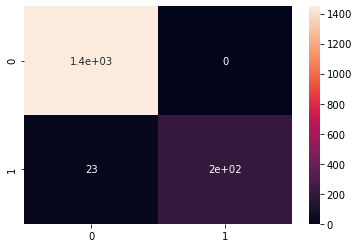

In [32]:
sns.heatmap(cm,annot=True)

In [33]:
emails = ["I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.",
         "SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info",
         "I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.",
         "Oh k...i'm watching here:)",
         "England v Macedonia - dont miss the goals/team news. Txt ur national team to 87077 eg ENGLAND to 87077 Try:WALES, SCOTLAND 4txt/Ãº1.20 POBOXox36504W45WQ 16+",
         "XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL"]

In [34]:
svm.predict(emails)

array(['ham', 'spam', 'ham', 'ham', 'ham', 'spam'], dtype=object)

### Save Model in Pickle & Joblib

In [35]:
import pickle,joblib

In [36]:
pickle.dump(svm,open('nlp_text_clf_pkl','wb'))

In [37]:
joblib.dump(svm,'nlp_text_clf_jbl')

['nlp_text_clf_jbl']

### Load Pickle Model

In [38]:
model_pkl=pickle.load(open('nlp_text_clf_pkl','rb'))
y_pred_pkl=model_pkl.predict(X_test)
print(accuracy_score(y_test,y_pred_pkl))

0.986244019138756


### Load Joblib Model

In [39]:
model_jbl=joblib.load('nlp_text_clf_jbl')
y_pred_jbl=model_jbl.predict(X_test)
print(accuracy_score(y_test,y_pred_jbl))

0.986244019138756


In [40]:
confusion_matrix(y_test,y_pred_jbl)

array([[1448,    0],
       [  23,  201]], dtype=int64)